Implemntaion of Load Forecasting(Day) using **ARIMA** model.

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 16.6MB/s 
     |████████████████████████████████| 2.1MB 37.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20


In [ ]:
import csv
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pmdarima
import random
import seaborn as sns
import statsmodels.tsa.stattools as ts
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving load.csv to load.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['load.csv']))

In [ ]:
train=df.head(700)
test=df[700:]

In [ ]:
pmdarima.arima.ndiffs(train)

0

In [ ]:
Arima_model=auto_arima(train, start_p=6, start_q=6, max_p=24, max_q=24, start_P=0, start_Q=0, max_P=0, max_Q=0, m=1, seasonal=False, trace=True, d=0, D=0, error_action='warn', suppress_warnings=True, random_state =1 , n_fits=1)

Performing stepwise search to minimize aic
Fit ARIMA(6,0,6)x(0,0,0,0) [intercept=True]; AIC=17567.949, BIC=17631.664, Time=4.288 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=18327.317, BIC=18336.419, Time=0.026 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=18153.809, BIC=18167.462, Time=0.067 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=18094.050, BIC=18107.703, Time=0.099 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=21423.543, BIC=21428.094, Time=0.021 seconds
Fit ARIMA(5,0,6)x(0,0,0,0) [intercept=True]; AIC=17669.269, BIC=17728.433, Time=3.989 seconds
Near non-invertible roots for order (5, 0, 6)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(6,0,5)x(0,0,0,0) [intercept=True]; AIC=17664.449, BIC=17723.613, Time=3.581 seconds
Near non-invertible roots for order (6, 0, 5)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the un

In [ ]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:               SARIMAX(8, 0, 6)   Log Likelihood               -8740.794
Date:                Fri, 03 Jul 2020   AIC                          17513.588
Time:                        20:51:35   BIC                          17586.406
Sample:                             0   HQIC                         17541.737
                                - 700                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.405e+05   9.28e-09   3.67e+13      0.000     3.4e+05     3.4e+05
ar.L1         -0.2789      0.054     -5.148      0.000      -0.385      -0.173
ar.L2         -0.0499      0.007     -6.899      0.000      -0.064      -0.036
ar.L3         -0.0452      0.009     -5.018      0.000      -0.063      -0.028
ar.L4         -0.0433      0.009     -4.823      0.000      -0.061      -0.026
ar.L5         -0.0542      0.007     -7.432      0.000      -0.068      -0.040
ar.L6         -0.0408      0.009     -4.473      0.000      -0.059      -0.023
ar.L7          0.9422      0.006    149.601      0.000       0.930       0.955
ar.L8          0.2354      0.049      4.829      0.000       0.140       0.331
ma.L1          1.0119      0.044     22.752      0.000       0.925       1.099
ma.L2          0.9817      0.045     21.946      0.000       0.894       1.069
ma.L3          0.9377      0.058     16.296      0.000       0.825       1.050
ma.L4          0.8693      0.049     17.869      0.000       0.774       0.965
ma.L5          0.8928      0.042     21.310      0.000       0.811       0.975
ma.L6          0.8845      0.030     29.488      0.000       0.826       0.943
sigma2      4.801e+09   3.58e-12   1.34e+21      0.000     4.8e+09     4.8e+09
===================================================================================
Ljung-Box (Q):                       78.15   Jarque-Bera (JB):               597.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.56
Prob(H) (two-sided):                  0.48   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.35e+36. Standard errors may be unstable.
"""

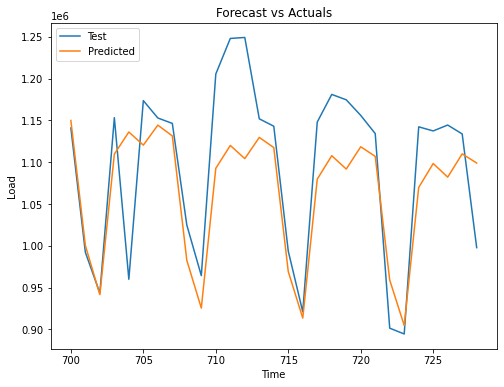

In [ ]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=29), index=test.index)
prediction.columns = ['Predicted_Temperature']
plt.figure(figsize=(8,6))
#<Figure size 1500x1000 with 0 Axes>
#plt.plot(train[700:], label='Training')
#[<matplotlib.lines.Line2D object at 0x7fbd668fa908>]
plt.plot(test[:50], label='Test')
#[<matplotlib.lines.Line2D object at 0x7fbd6e8871d0>]
plt.plot(prediction[:50], label='Predicted')
#[<matplotlib.lines.Line2D object at 0x7fbd6e87a5c0>]
plt.legend(loc = 'upper left')
plt.title('Forecast vs Actuals')
plt.ylabel("Load")
plt.xlabel("Time")
#<matplotlib.legend.Legend object at 0x7fbd6e887320>
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape=mean_absolute_percentage_error(test, prediction)

In [ ]:
mape

4.728953674163357

In [ ]:
model = ARIMA(train, order=(8,0,6))  
fitted = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


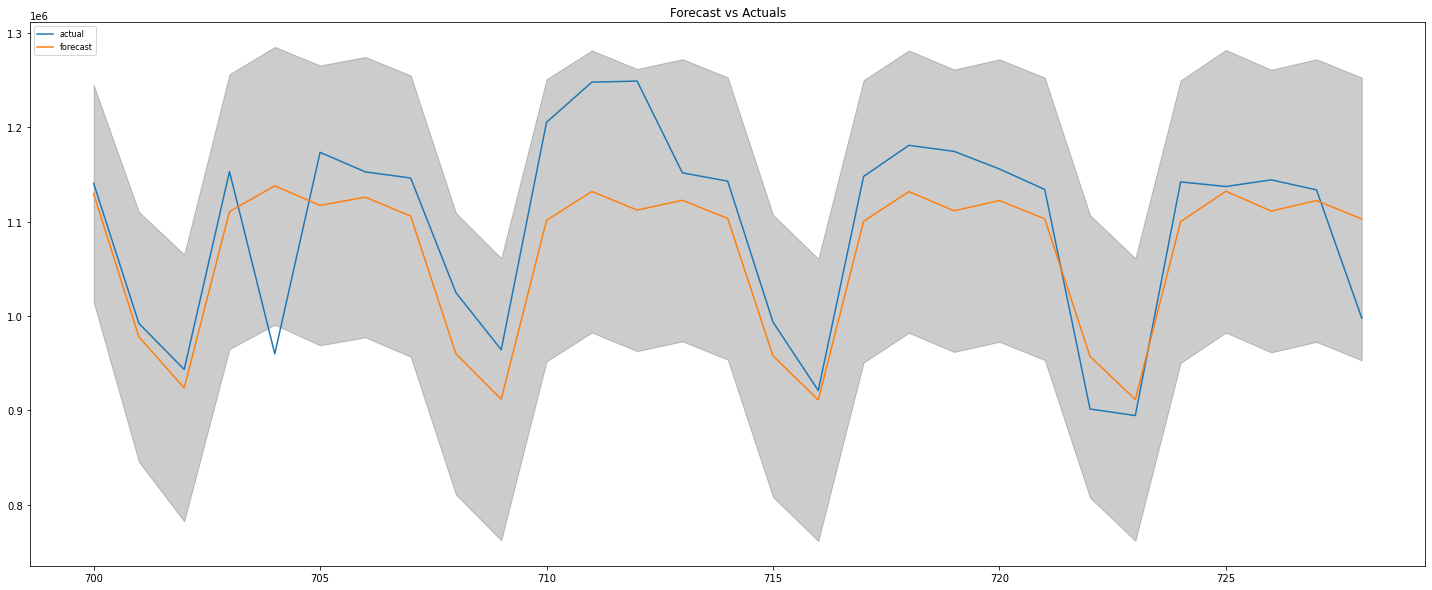

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(29, alpha=0.05) 
# Make as pandas series
fc_series = pd.Series(fc,index=test.index)
lower_series = pd.Series(conf[:, 0],index=test.index)
upper_series = pd.Series(conf[:, 1],index=test.index)

# Plot
plt.figure(figsize=(25,10))
#plt.plot(train, label='training')
plt.xlim=(16000,17518)
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.20)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()